## <b>Project Overview <b>
This project focuses on cleaning and analyzing Bitcoin data, visualizing price trends over time, and uncovering key insights related to Bitcoin's volatility and market behavior.

<b> Libraries Used:<b>

<p>pandas, numpy → Data manipulation and preprocessing<p>
<p>matplotlib, seaborn → Basic data visualization<p>
<p>plotly, cufflinks → Interactive visualizations<p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"E:\Python\PRJ\Bitcoin\Bitcoin\bitcoin_price_Training - Training.csv")

In [5]:
df.shape

(1556, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


# Doing Data Pre-processing !
        Check whether data-types are correct or not 
        check whether Data have missing value or not 
        check whether data have duplicate entries or not !
        

In [16]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

Date is to be in Date-time format inorder to perform a time series analysis but In the current dataset 
the date is stated as an object which is to be converted in the date time format..

In [19]:
df['Date']= df['Date'].astype('datetime64[ns]')

In [21]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [23]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [25]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [27]:
df.isnull().sum() ## check whether we have missing value or not !

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [29]:
df.duplicated().sum()  ## No duplicated value ..

0

#### Now sort the dataset from oldest - recent

In [32]:
df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [34]:
data = df.sort_index(ascending=False).reset_index()

#  Analysis of Stock Price Changes Over Time

<p>Goal: Understand how Bitcoin price fluctuated over different time periods.<p>
<p>Method: Used a line plot to visualize Bitcoin price trends.<p>


In [37]:
data.head()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [39]:
data.drop('index' , axis=1 , inplace=True)

In [41]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [43]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

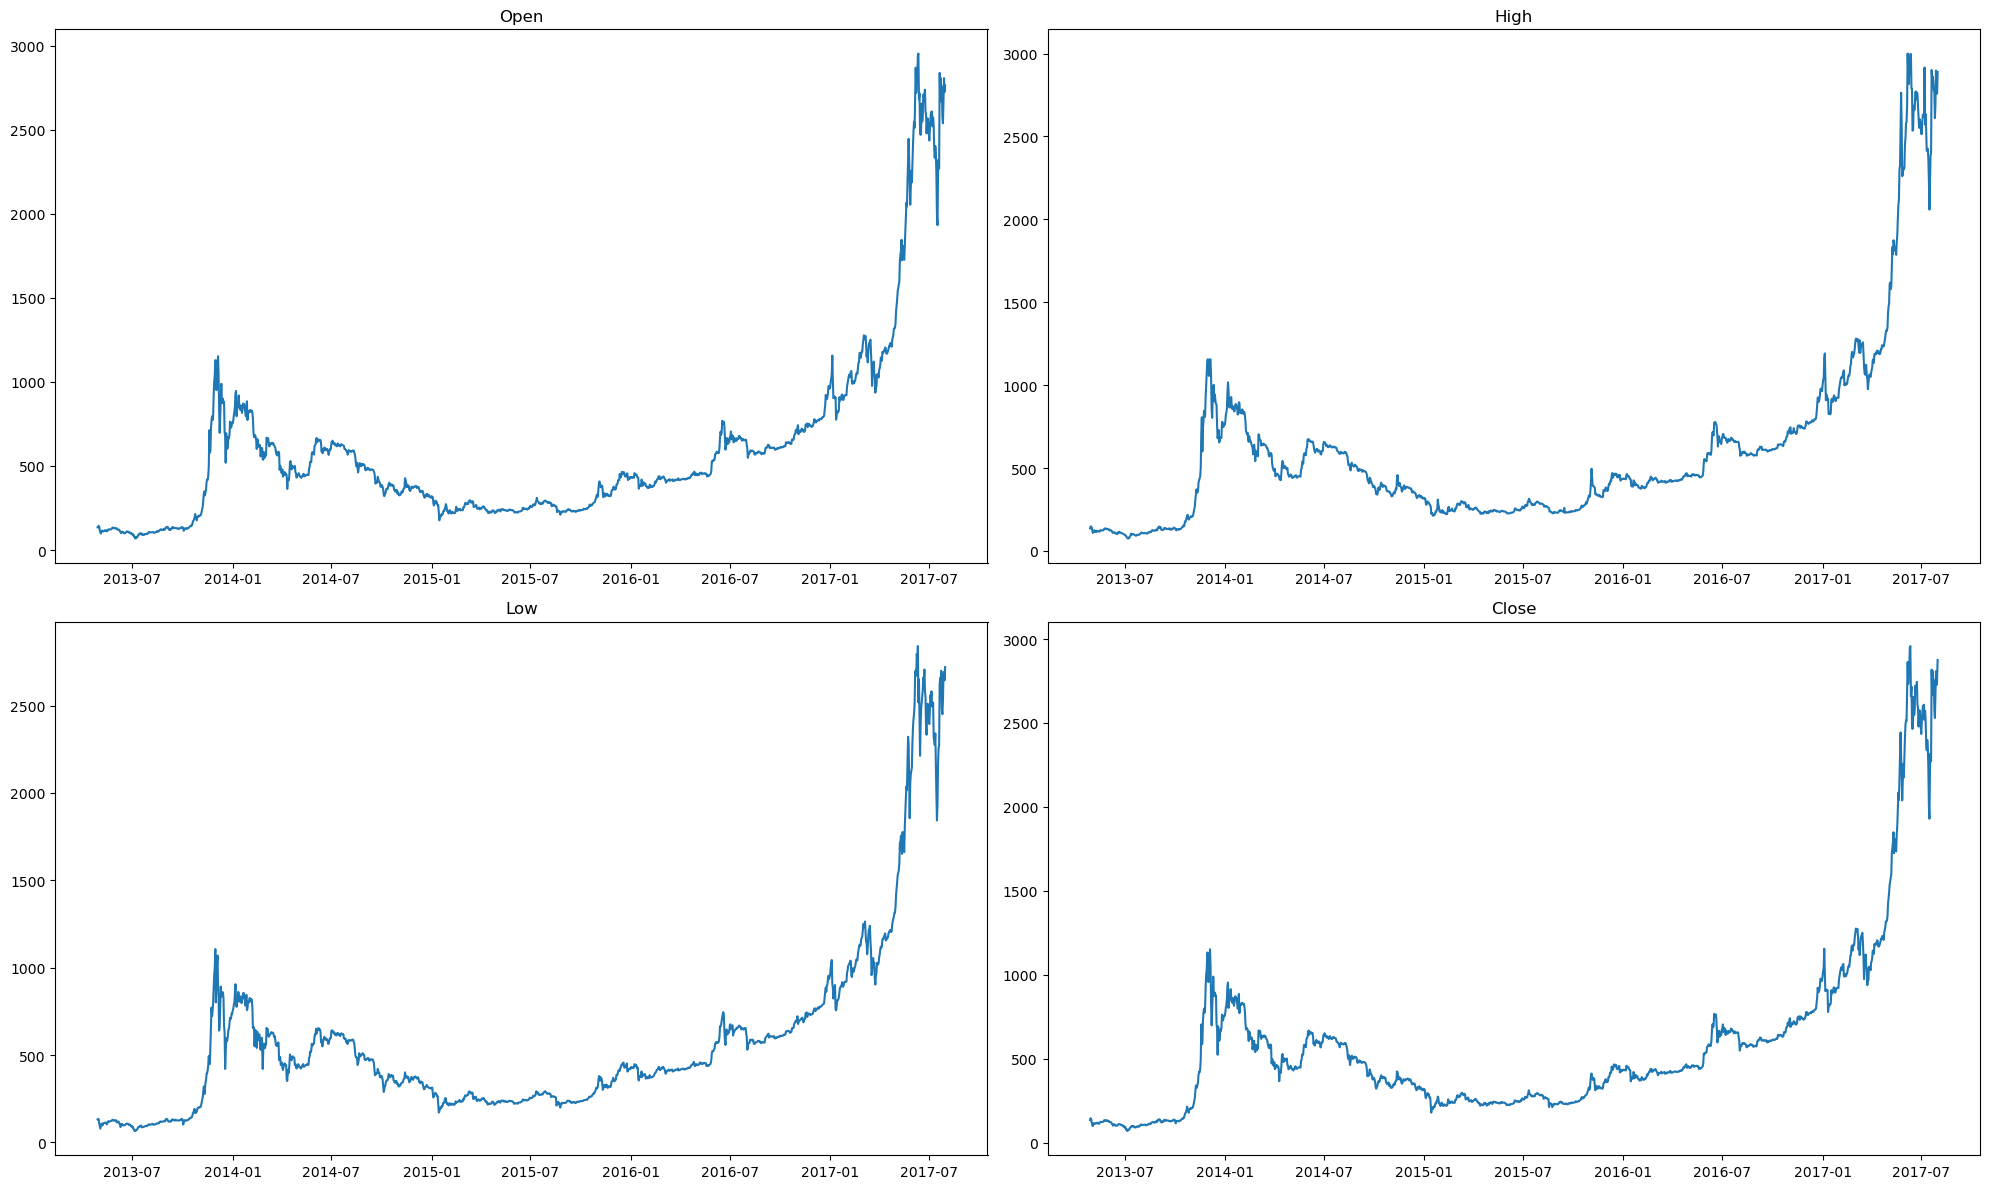

In [46]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

<p>📈 Key Insight:<p>

<p>A clear upward trend was observed during certain periods, indicating bullish phases.<p>
<p>Some high-volatility periods with sharp price increases and declines.<p>
<p>📌 Libraries Used: matplotlib, seaborn for static plots, and plotly for interactive price trends.<p>

### Analysing open , high , low , close value of bitcoin for first 50 rows 

<p>Goal: Compare Bitcoin’s daily trading range.<p>
<p>Method: Used a candlestick chart to visualize OHLC data.<p>


In [45]:
data.shape

(1556, 7)

In [47]:
bitcoin_sample = data[0:50]

In [49]:
import chart_studio.plotly as py

import plotly.graph_objs as go

import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [50]:
init_notebook_mode(connected=True)

In [53]:
trace = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

In [55]:
candle_data = [trace]

In [57]:
candle_data

[Candlestick({
     'close': array([134.21, 144.54, 139.  , 116.99, 105.21,  97.75, 112.5 , 115.91, 112.3 ,
                     111.5 , 113.57, 112.67, 117.2 , 115.24, 115.  , 117.98, 111.5 , 114.22,
                     118.76, 123.02, 123.5 , 121.99, 122.  , 122.88, 123.89, 126.7 , 133.2 ,
                     131.98, 133.48, 129.75, 129.  , 132.3 , 128.8 , 129.  , 129.3 , 122.29,
                     122.22, 121.42, 121.65, 118.  , 111.5 , 108.3 , 100.  , 106.35, 108.9 ,
                     108.15, 104.  ,  99.98,  99.99,  99.51]),
     'high': array([135.98, 147.49, 146.93, 139.89, 125.6 , 108.13, 115.  , 118.8 , 124.66,
                    113.44, 115.78, 113.46, 122.  , 118.68, 117.45, 118.7 , 119.8 , 115.81,
                    118.76, 125.3 , 125.25, 124.5 , 123.62, 123.  , 124.  , 126.93, 133.85,
                    133.22, 136.  , 135.47, 130.58, 132.59, 132.25, 129.9 , 129.78, 129.4 ,
                    122.5 , 123.84, 123.47, 123.1 , 119.  , 111.42, 108.99, 110.1 , 109.6

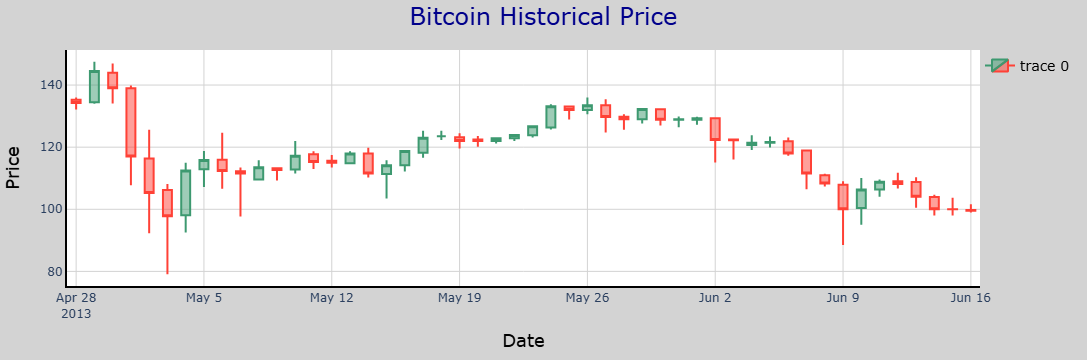

In [59]:
layout = {
    'title': {
        'text': 'Bitcoin Historical Price',  # Title text
        'font': {'size': 24, 'color': 'darkblue'},  # Title font size and color
        'x': 0.5,  # Title alignment (center)
        'xanchor': 'center',  # Align title to the center
    },
    'xaxis': {
        'title': 'Date',
        'title_font': {'size': 18, 'color': 'black'},  # X-axis title font
        'showgrid': True,  # Show gridlines for the x-axis
        'gridcolor': 'lightgray',  # Gridline color
        'showline': True,  # Show axis line
        'linewidth': 2,  # Axis line thickness
        'linecolor': 'black',  # Axis line color
    },
    'yaxis': {
        'title': 'Price',
        'title_font': {'size': 18, 'color': 'black'},  # Y-axis title font
        'showgrid': True,  # Show gridlines for the y-axis
        'gridcolor': 'lightgray',  # Gridline color
        'showline': True,  # Show axis line
        'linewidth': 2,  # Axis line thickness
        'linecolor': 'black',  # Axis line color
    },
    'paper_bgcolor': 'lightgray',  # Paper background color
    'plot_bgcolor': 'white',  # Plot area background color
    'showlegend': True,  # Show legend
    'legend': {
        'x': 1,  # Position legend to the right
        'y': 1,
        'font': {'size': 14, 'color': 'black'},  # Legend font style
    },
    'margin': {'t': 50, 'b': 50, 'l': 50, 'r': 50},  # Adjust margins for better spacing
    'hovermode': 'closest',  # Hover behavior
}

fig= go.Figure(data= candle_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

<p>📈 Key Insight:<p>

<p>There were significant intraday price swings, showing how Bitcoin’s volatility impacted daily trades.<p>
<p>Many days had high wicks, indicating price fluctuations before closing near open price.<p>
<p>📌 Libraries Used: plotly.graph_objects (candlestick chart for better insights).<p>


## Analysing closing price (on normal scale & log-scale)

<p>Goal: Understand the distribution and trend of closing prices.<p>
<p>Method: Plotted the closing price on a linear and logarithmic scale.<p>

In [62]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [64]:
## setting date as index
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

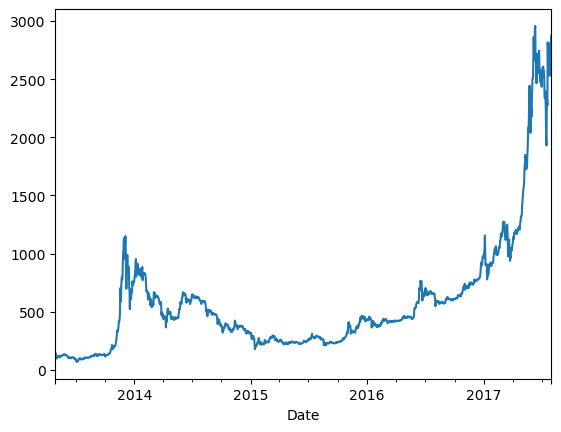

In [66]:
data['Close'].plot()


<Axes: xlabel='Date'>

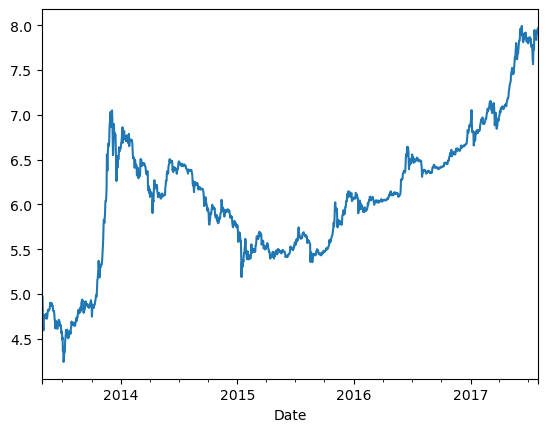

In [70]:
np.log1p(data['Close']).plot()

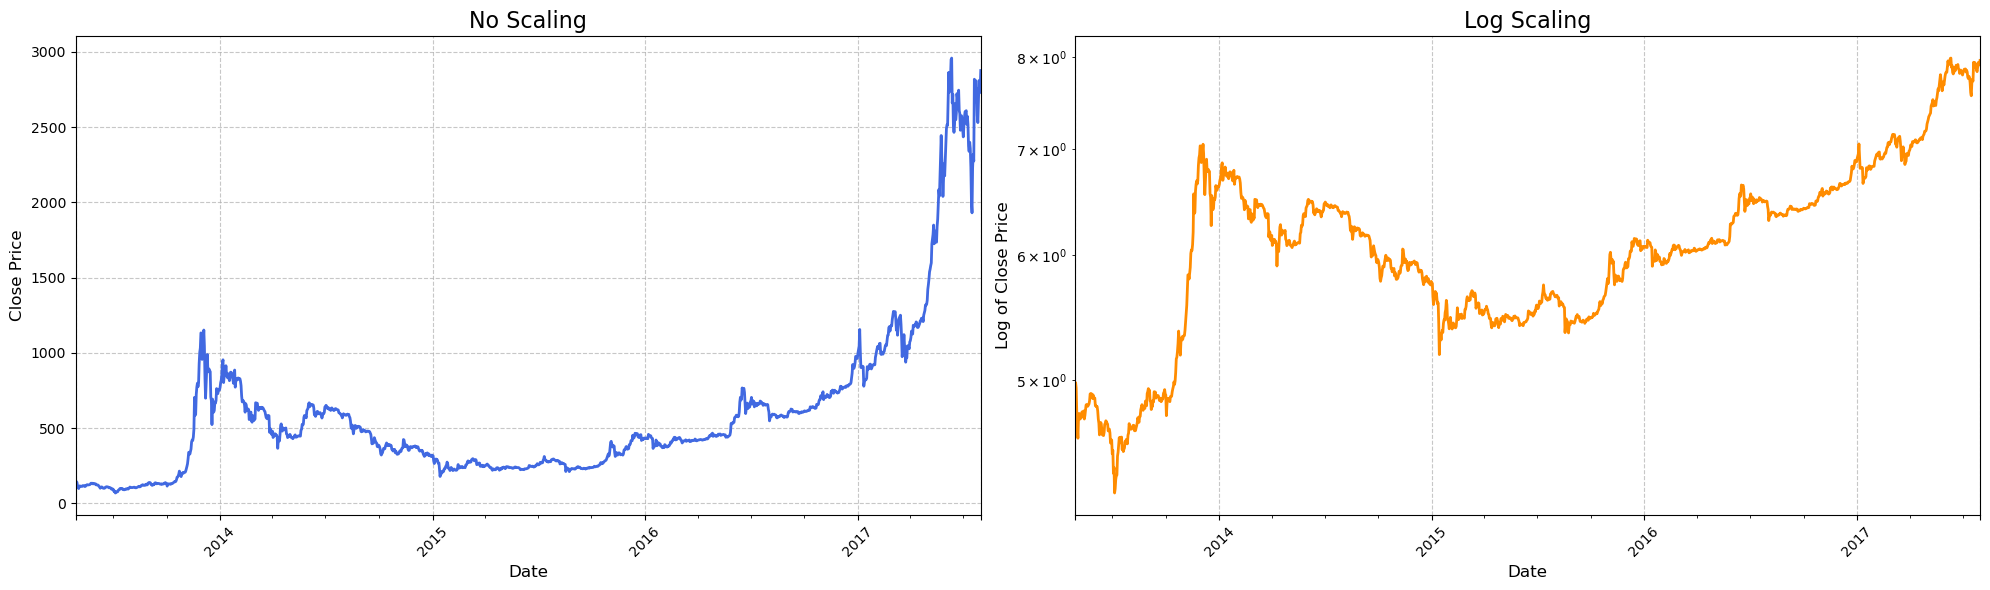

In [71]:
# Create a figure with a larger size
plt.figure(figsize=(20,6))

# First subplot: No scaling
plt.subplot(1, 2, 1)
data['Close'].plot(color='royalblue', linewidth=2)
plt.title('No Scaling', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.xticks(rotation=45)

# Second subplot: Log scaling
plt.subplot(1, 2, 2)
np.log1p(data['Close']).plot(color='darkorange', linewidth=2)
plt.title('Log Scaling', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log of Close Price', fontsize=12)
plt.yscale('log')  # Apply log scale to y-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.xticks(rotation=45)

# Add some space between subplots
plt.tight_layout()

# Show the plot
plt.show()

Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases..

log scale is always better if u have outliers or some high values in data


Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers



## Analyse closing Price on Yearly , Quarterly , monthly basis 

In [68]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [72]:
## finding avg price of bitcoin on yearly basis ..

data['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

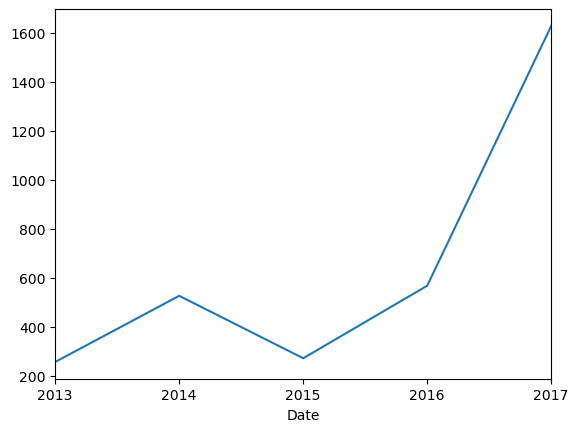

In [74]:
## yearly
data['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

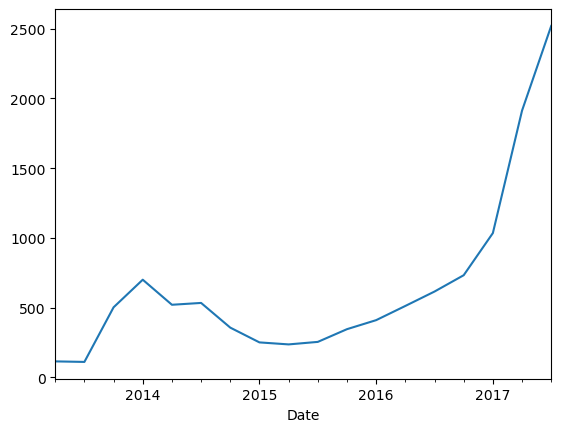

In [76]:
##quarterly  
data['Close'].resample('QE').mean().plot()

<Axes: xlabel='Date'>

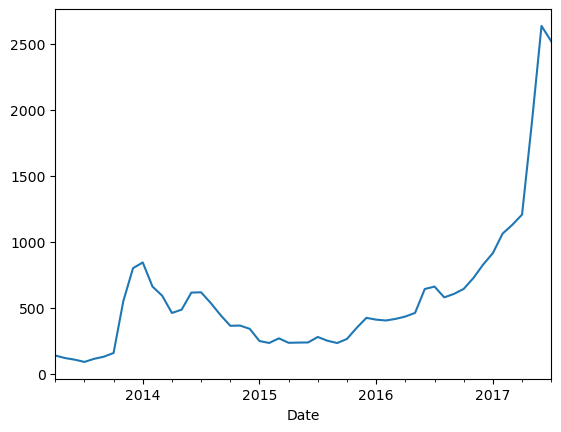

In [78]:
##monthly  
data['Close'].resample('ME').mean().plot()

##  Analysing Daily change in Closing price of stocks

In [81]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [83]:
## calculating percent change
data['Close_price_pct_change']=data['Close'].pct_change()*100

In [105]:
data

,Open,High,Low,Close,Volume,Market Cap,Close_price_pct_change
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",7.696893
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",-3.832849
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",-15.834532
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",-10.069237
...,...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",5.626915
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",5.136276
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",-2.939114


In [85]:
##!pip install cufflinks

In [87]:
import cufflinks as cf
cf.go_offline()

<Axes: xlabel='Date'>

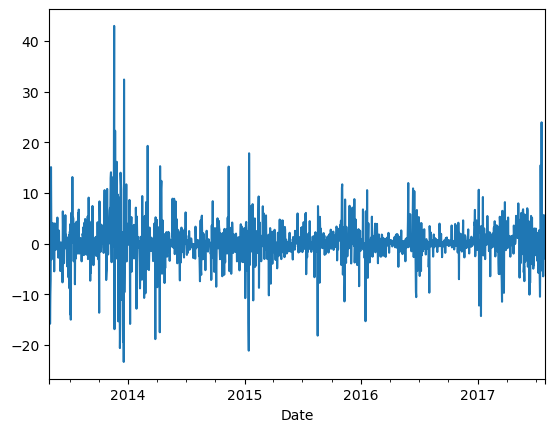

In [89]:
data['Close_price_pct_change'].plot()

In [152]:
## Converting index to str as we get warning for cf
data.index= data.index.astype('str')

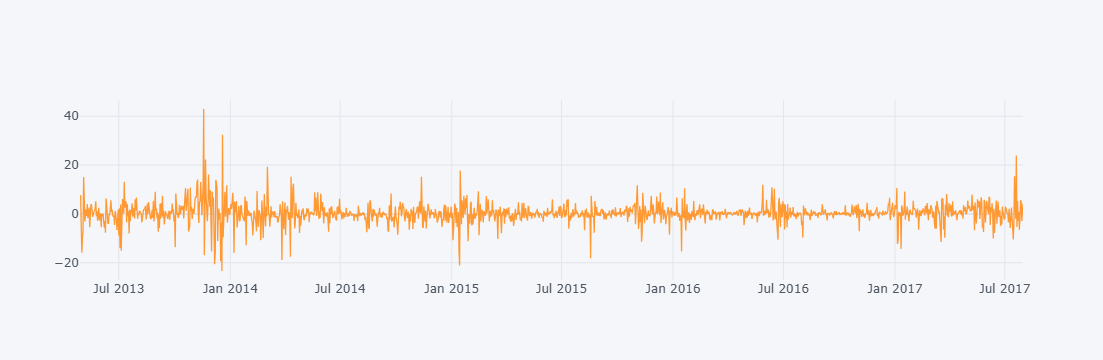

In [148]:
data['Close_price_pct_change'].iplot()